# Wrangle and Analyze Data Project Details 
1. `wrangle_act.ipynb`: code for gathering, assessing, cleaning, analyzing, and visualizing data
2. `wrangle_report.pdf` or `wrangle_report.html`: `300-600` word documentation for data wrangling steps: gather, assess, and clean 
2. `act_report.pdf` or `act_report.html`: `250` word minimum documentation of analysis and insights into final data
3. `twitter_archive_enhanced.csv`: file as given
4. `image_predictions.tsv`: file downloaded programmatically
5. `tweet_json.txt`: file constructed via API
6. `twitter_archive_master.csv`: combined and cleaned data
7. any additional files
8. At least three `3` insights and one `1` visualization must be assessed. 


## Part I: Gather

In [56]:
import pandas as pd
import requests
import os
import logging
import sys
import json
import datetime
import numpy as np
Logger = None

#### OS, File I/O, Requests

In [3]:
folder_name = 'tweet_image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

#### Twitter API, Tweepy, File I/O 

1. Query all of the tweet IDs in the WeRateDogs Twitter archive, printing out each tweet ID after it was queried.
2. Set the wait_on_rate_limit and wait_on_rate_limit_notify parameters to True in the tweepy.api class.
3. Tweet data is stored in JSON format by Twitter. 
4. Set the tweet_mode parameter to 'extended' in the get_status call, i.e., api.get_status(tweet_id, tweet_mode='extended').
- You only want original ratings (no retweets) that have images. 
- Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

In [21]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'API_KEY'
consumer_secret = 'SECRET'
access_token = 'TOKEN'
access_secret = 'SECRET'
    
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
tweet_ids = df.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Got thru!")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Did not get thru.")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [2]:
with open('tweet_json.txt') as file:
    tweet_json_list = []
    for line in file:
        tweet_json_list.append(json.loads(line)) # cite 1

In [3]:
tweet_json_list[7]

{'created_at': 'Fri Jul 28 00:22:40 +0000 2017',
 'id': 890729181411237888,
 'id_str': '890729181411237888',
 'full_text': "When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq",
 'truncated': False,
 'display_text_range': [0, 118],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 890729118844600320,
    'id_str': '890729118844600320',
    'indices': [119, 142],
    'media_url': 'http://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg',
    'url': 'https://t.co/v0nONBcwxq',
    'display_url': 'pic.twitter.com/v0nONBcwxq',
    'expanded_url': 'https://twitter.com/dog_rates/status/890729181411237888/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 1200, 'h': 1328, 'resize': 'fit'},
     'medium': {'w': 1084, 'h': 1200,

In [139]:
df_json = pd.DataFrame.from_records(tweet_json_list)

#### Pandas read_csv and tsv

In [142]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [143]:
df_tsv = pd.read_csv('tweet_image_predictions/image-predictions.tsv', sep='\t', header=0, encoding='utf-8')

## Part II: Assess

- Assess and clean at least **eight `8` quality issues** and **two `2` tidiness issues** in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. 
- You do not need to gather the tweets beyond August 1st, 2017. 
- You only want ratings (no retweets) that have images from JSON Twitter API data
- Image prediction scores are in `tsv` for each dog and T/F confirms prediction accurate or not
- Dog stages are: `doggo` (big pupper and older), `floofer` (any dog with +fur), `pupper` (small doggo and younger), `puppo` (transition between pupper and doggo)

In [144]:
df_archive.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
452,818614493328580609,NaN,NaN,2017-01-10 00:24:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bear. He's a passionate believer of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818614493...,12,10,Bear,None,None,None,None


In [145]:
df_tsv.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
961,705898680587526145,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,1,collie,0.808276,True,Border_collie,0.059437,True,groenendael,0.026720,True
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
68,667182792070062081,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,1,golden_retriever,0.949892,True,Irish_setter,0.010564,True,Chesapeake_Bay_retriever,0.005821,True


In [146]:
df_json.sample(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
2219,None,None,Sat Nov 21 03:44:27 +0000 2015,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667911422597287936, 'id_str'...",487,False,Wow. Armored dog here. Ready for battle. Face ...,None,...,NaN,NaN,NaN,NaN,300,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [147]:
df_json.info() # only want ratings (not retweets) with url image

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2333 non-null object
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2061 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
full_text                        2333 non-null object
geo                              0 non-null object
id                               2333 non-null int64
id_str                           2333 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [148]:
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [149]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality

**twitter-archive-enhanced.csv**: 
1. `NaN` values in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_timestamp`
2. `None` values in `name`,  `doggo`, `floofer`, `pupper`, `puppo`
3. Single letters in `name`

**tweet_json.txt**: 
4.  `None` values in `contributors`, `coordinates`, `geo`
5. `NaN` values in `extended_entities`, `quoted_status`, `quoted_status_id`, `quoted_status_id_str`, `quoted_status_permalink`, `retweeted_status`
6. remame `id_str` to `tweet_id` for merging dataframes

**image-predictions.tsv**
7. `p1, p2, p3` have both upper and lower case strings 
8. `p1, p2, p3` have `_` between name
9. `p1, p2, p3` have non-dog names

### Tidiness


- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table.
- A single observational unit is stored in multiple tables.

1. `image-predictions.tsv` columns names need to be renamed to show prediction outcome
2. all three `json`, `tsv`, `txt` DataFrames need to be merged to combine only important data joining on `tweet_id`

## Part III: Clean

In [150]:
archive_clean = df_archive.copy()
json_clean = df_json.copy()
tsv_clean = df_tsv.copy()

In [151]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [152]:
json_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [153]:
tsv_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### drop columns, drop null values, convert to timestamp, ignore lower case names

In [154]:
archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'text', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], inplace=True)

In [155]:
json_clean.drop(columns=['contributors', 'coordinates', 'display_text_range', 'entities', 'extended_entities', 'favorited', 'geo', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable','quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'retweeted', 'retweeted_status', 'source', 'truncated', 'user'], inplace=True)

In [156]:
tsv_clean.drop(columns=['img_num', 'p1_conf', 'p2_conf', 'p3_conf'], inplace=True)

In [157]:
archive_clean.replace(['None'], np.nan, inplace = True) # replace None with NaN in order to dropna truthy 
archive_clean.drop(archive_clean[  (archive_clean['name'].str.len() <=3 )].index, inplace=True) # drop names <=3 

In [158]:
archive_clean.isnull().sum()

tweet_id                 0
source                   0
rating_numerator         0
rating_denominator       0
name                   745
doggo                 2084
floofer               2169
pupper                1940
puppo                 2147
dtype: int64

In [159]:
archive_clean['name'].replace('such','NaN',inplace=True) # edge case
archive_clean['name'].replace('quite','NaN',inplace=True) # edge case 

In [160]:
archive_clean.shape, json_clean.shape, tsv_clean.shape

((2177, 9), (2333, 5), (2075, 8))

In [161]:
json_clean['created_at'] = pd.to_datetime(json_clean['created_at'])

In [162]:
json_clean['created_at'] = json_clean['created_at'].map(lambda x: x.strftime('%Y%m%d%' + ' ' + '%I:%M %p') if x else "") # cite 2

#### rename columns

In [163]:
json_clean = json_clean.rename(columns={"id": "tweet_id", "created_at": "timestamp"})

In [164]:
archive_clean = archive_clean.rename(columns={"name": "dog_name"})

In [165]:
tsv_clean = tsv_clean.rename(columns={"p1": "first_dog_prediction", "p1_dog": "first_prediction_outcome", \
                         "p2": "second_dog_prediction", "p2_dog": "second_prediction_outcome", \
                          "p3": "third_dog_prediction", "p3_dog": "third_prediction_outcome"})

#### string function replace and title

In [166]:
tsv_clean['first_dog_prediction'] = tsv_clean['first_dog_prediction'].astype(str).replace(to_replace ='_', value = ' ', regex = True) 
tsv_clean['first_dog_prediction'] = tsv_clean['first_dog_prediction'].astype(str).str.title()

tsv_clean['second_dog_prediction'] = tsv_clean['second_dog_prediction'].astype(str).replace(to_replace ='_', value = ' ', regex = True) 
tsv_clean['second_dog_prediction'] = tsv_clean['second_dog_prediction'].astype(str).str.title()

tsv_clean['third_dog_prediction'] = tsv_clean['third_dog_prediction'].astype(str).replace(to_replace ='_', value = ' ', regex = True) 
tsv_clean['third_dog_prediction'] = tsv_clean['third_dog_prediction'].astype(str).str.title()

In [167]:
tsv_clean.tweet_id.dtype, json_clean.tweet_id.dtype, archive_clean.tweet_id.dtype # check join key same type 

(dtype('int64'), dtype('int64'), dtype('int64'))

In [168]:
# clean ratings: df['rating_numerator'] = df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True) #regex extracting
# # cite: https://knowledge.udacity.com/questions/49748

# replace column names with nan: 
# mask1 = twitter_clean.name.str.isupper()
# mask2 = df_1_clean.name.str.islower()
# column_name = 'name'
# df_clean.loc[(mask1 | mask2), column_name] = np.nan 
# # cite: https://knowledge.udacity.com/questions/45647

#### Merge DataFrames

In [169]:
# json_clean.sample(3), tsv_clean.sample(3), archive_clean.sample(3)

In [170]:
json_clean.columns, tsv_clean.columns, archive_clean.columns

(Index(['timestamp', 'favorite_count', 'full_text', 'tweet_id',
        'retweet_count'],
       dtype='object'), Index(['tweet_id', 'jpg_url', 'first_dog_prediction',
        'first_prediction_outcome', 'second_dog_prediction',
        'second_prediction_outcome', 'third_dog_prediction',
        'third_prediction_outcome'],
       dtype='object'), Index(['tweet_id', 'source', 'rating_numerator', 'rating_denominator',
        'dog_name', 'doggo', 'floofer', 'pupper', 'puppo'],
       dtype='object'))

In [171]:
from functools import reduce
dfs = [json_clean, tsv_clean, archive_clean]
master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs) # cite 3

In [172]:
master.sample(1)

,timestamp,favorite_count,full_text,tweet_id,retweet_count,jpg_url,first_dog_prediction,first_prediction_outcome,second_dog_prediction,second_prediction_outcome,third_dog_prediction,third_prediction_outcome,source,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
345,20170104 01:05 AM,31915,Meet Moose. He doesn't want his friend to go b...,816450570814898180,8526,https://pbs.twimg.com/media/C1SddosXUAQcVR1.jpg,Web Site,False,Envelope,False,Nail,False,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Moose,NaN,NaN,NaN,NaN


In [173]:
master.columns

Index(['timestamp', 'favorite_count', 'full_text', 'tweet_id', 'retweet_count',
       'jpg_url', 'first_dog_prediction', 'first_prediction_outcome',
       'second_dog_prediction', 'second_prediction_outcome',
       'third_dog_prediction', 'third_prediction_outcome', 'source',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

In [174]:
master.reindex(columns=['timestamp', 'tweet_id', 'full_text', 'jpg_url', 'source', 'dog_name', 
        'favorite_count', 'retweet_count', 'rating_numerator', 'rating_denominator',
       'first_dog_prediction', 'first_prediction_outcome','second_dog_prediction', 'second_prediction_outcome',
       'third_dog_prediction', 'third_prediction_outcome', 'doggo', 'floofer', 'pupper', 'puppo'])

,timestamp,tweet_id,full_text,jpg_url,source,dog_name,favorite_count,retweet_count,rating_numerator,rating_denominator,first_dog_prediction,first_prediction_outcome,second_dog_prediction,second_prediction_outcome,third_dog_prediction,third_prediction_outcome,doggo,floofer,pupper,puppo
0,20170801 04:23 PM,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Phineas,37274,7983,13,10,Orange,False,Bagel,False,Banana,False,NaN,NaN,NaN,NaN
1,20170801 12:17 AM,892177421306343426,This is Tilly. She's just checking pup on you....,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Tilly,32047,5928,13,10,Chihuahua,True,Pekinese,True,Papillon,True,NaN,NaN,NaN,NaN
2,20170731 12:18 AM,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Archie,24147,3915,12,10,Chihuahua,True,Malamute,True,Kelpie,True,NaN,NaN,NaN,NaN
3,20170730 03:58 PM,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Darla,40588,8129,13,10,Paper Towel,False,Labrador Retriever,True,Spatula,False,NaN,NaN,NaN,NaN
4,20170729 04:00 PM,891327558926688256,This is Franklin. He would like you to stop ca...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Franklin,38826,8813,12,10,Basset,True,English Springer,True,German Short-Haired Pointer,True,NaN,NaN,NaN,NaN
5,20170729 12:08 AM,891087950875897856,Here we have a majestic great white breaching ...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,19501,2931,13,10,Chesapeake Bay Retriever,True,Irish Terrier,True,Indian Elephant,False,NaN,NaN,NaN,NaN
6,20170728 12:22 AM,890729181411237888,When you watch your owner call another dog a g...,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,62862,17788,13,10,Pomeranian,True,Eskimo Dog,True,Pembroke,True,NaN,NaN,NaN,NaN
7,20170727 04:25 PM,890609185150312448,This is Zoey. She doesn't want to be one of th...,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Zoey,26842,4033,13,10,Irish Terrier,True,Irish Setter,True,Chesapeake Bay Retriever,True,NaN,NaN,NaN,NaN
8,20170726 03:59 PM,890240255349198849,This is Cassie. She is a college pup. Studying...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Cassie,30741,6949,14,10,Pembroke,True,Cardigan,True,Chihuahua,True,doggo,NaN,NaN,NaN
9,20170726 12:31 AM,890006608113172480,This is Koda. He is a South Australian decksha...,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,"<a href=""http://twitter.com/download/iphone"" r...",Koda,29576,6905,13,10,Samoyed,True,Pomeranian,True,Chow,True,NaN,NaN,NaN,NaN


## Part IV: Analyze and Store

#### sqlalchemy and sqlite 

In [38]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///tweets.db')

In [48]:
master.to_sql('new', engine, index=False)

In [49]:
tweets = pd.read_sql('SELECT * FROM new', engine)

In [51]:
tweets.head(1)

,timestamp,favorite_count,full_text,tweet_id,retweet_count,jpg_url,first_dog_prediction,first_prediction_outcome,second_dog_prediction,second_prediction_outcome,third_dog_prediction,third_prediction_outcome,source,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,20170801 04:23 PM,37274,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,7983,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0,Bagel,0,Banana,0,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Phineas,None,None,None,None
1,20170801 12:17 AM,32047,This is Tilly. She's just checking pup on you....,892177421306343426,5928,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,1,Pekinese,1,Papillon,1,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Tilly,None,None,None,None
2,20170731 12:18 AM,24147,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,3915,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,1,Malamute,1,Kelpie,1,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Archie,None,None,None,None


#### seaborn, matplotlib

In [175]:
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
py.sign_in("IPython.Demo", "1fw3zw2o13")


In [176]:
import plotly
plotly.__version__

'3.10.0'

In [201]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec # subplots
import matplotlib.ticker as ticker
sns.set(style="ticks", color_codes=True)
import seaborn as sns; sns.set()

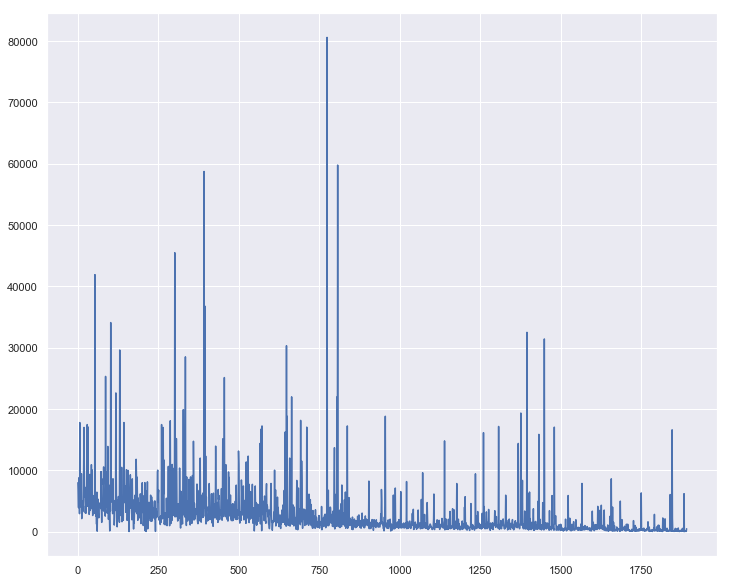

In [200]:
plt.figure(figsize=(12,10))
plt.plot(master.retweet_count)

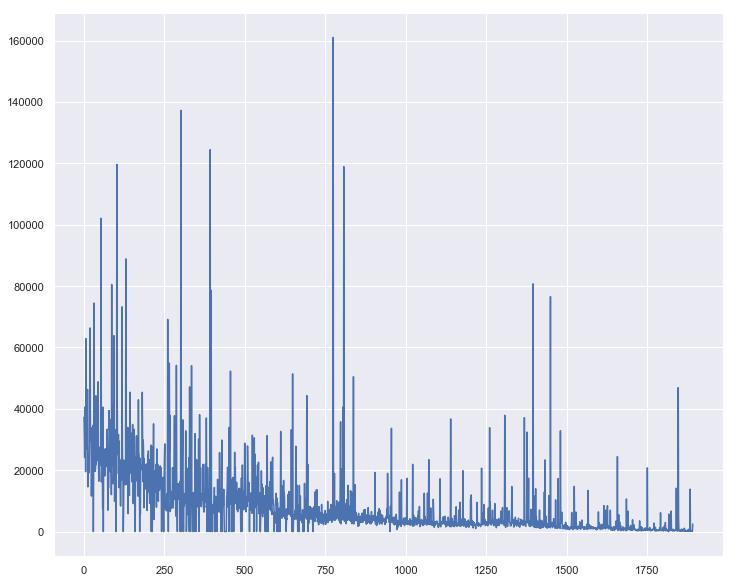

In [193]:
plt.figure(figsize=(12,10))
plt.plot(master.favorite_count)

In [180]:
from IPython.display import Image
Image(url='https://placeholder.com')

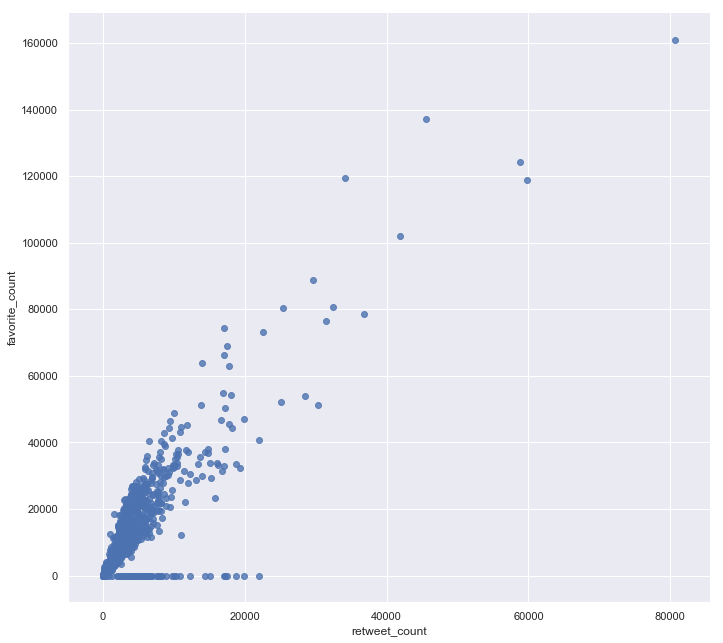

In [188]:
g=sns.lmplot('retweet_count', 'favorite_count', data=master, fit_reg=False)
g.fig.set_size_inches(12, 10)

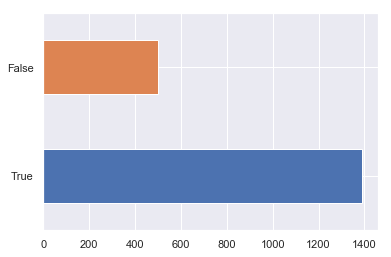

In [226]:
master['first_prediction_outcome'].value_counts().plot(kind='barh')

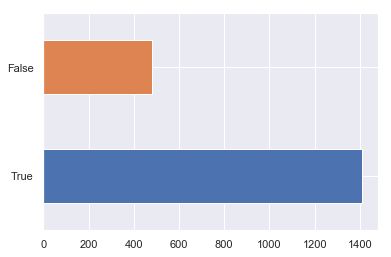

In [218]:
master['second_prediction_outcome'].value_counts().plot(kind='barh')

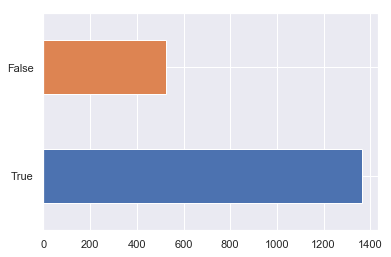

In [219]:
master['third_prediction_outcome'].value_counts().plot(kind='barh')

In [438]:
a = master['first_prediction_outcome'].value_counts()
b = master['second_prediction_outcome'].value_counts()
c = master['third_prediction_outcome'].value_counts()
print(a, '\n', b, '\n', c, '\n')

True     1391
False     501
Name: first_prediction_outcome, dtype: int64 
 True     1411
False     481
Name: second_prediction_outcome, dtype: int64 
 True     1366
False     526
Name: third_prediction_outcome, dtype: int64 



In [353]:
master.sample(1)

,timestamp,favorite_count,full_text,tweet_id,retweet_count,jpg_url,first_dog_prediction,first_prediction_outcome,second_dog_prediction,second_prediction_outcome,third_dog_prediction,third_prediction_outcome,source,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
1234,20160114 02:25 AM,2115,This is Kramer. He's a Picasso Tortellini. Tie...,687460506001633280,557,https://pbs.twimg.com/media/CYpZrtDWwAE8Kpw.jpg,Boston Bull,True,Boxer,True,French Bulldog,True,"<a href=""http://twitter.com/download/iphone"" r...",10,10,Kramer,NaN,NaN,NaN,NaN


In [360]:
dog_breeds = pd.read_csv('breeds.txt', engine='python', doublequote=False, header=None)
dog_breeds # cite 5

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
0,'Blue Lacy','Queensland Heeler','Rhod Ridgeback','Retriever','Chinese Sharpei','Black Mouth Cur','Catahoula','Staffordshire','Affenpinscher','Afghan Hound',...,'Weimaraner','Welsh Springer Spaniel','Welsh Terrier','West Highland White Terrier','Whippet','Wire Fox Terrier','Wirehaired Pointing Griffon','Wirehaired Vizsla','Xoloitzcuintli','Yorkshire Terrier'


In [358]:
# master.source[0].split('/')[2].value_counts().index.tolist()
# master.source.value_counts().index.tolist()
# master.source.str.get_dummies(sep='/')[2].sum()
## LOGIC HERE FOR HOW MANY TIMES DOG NAME == BREED 

In [133]:
data = {'date': master['timestamp'], 'likes': master['favorite_count']}
date_likes = pd.DataFrame(data, columns = ['date', 'likes'])
date_likes.head()

,date,likes
0,20170801 04:23 PM,37274
1,20170801 12:17 AM,32047
2,20170731 12:18 AM,24147
3,20170730 03:58 PM,40588
4,20170729 04:00 PM,38826


In [134]:
date_likes['date'] = pd.to_datetime(date_likes['date']) # cite 4
date_likes.index = date_likes['date']
del date_likes['date']

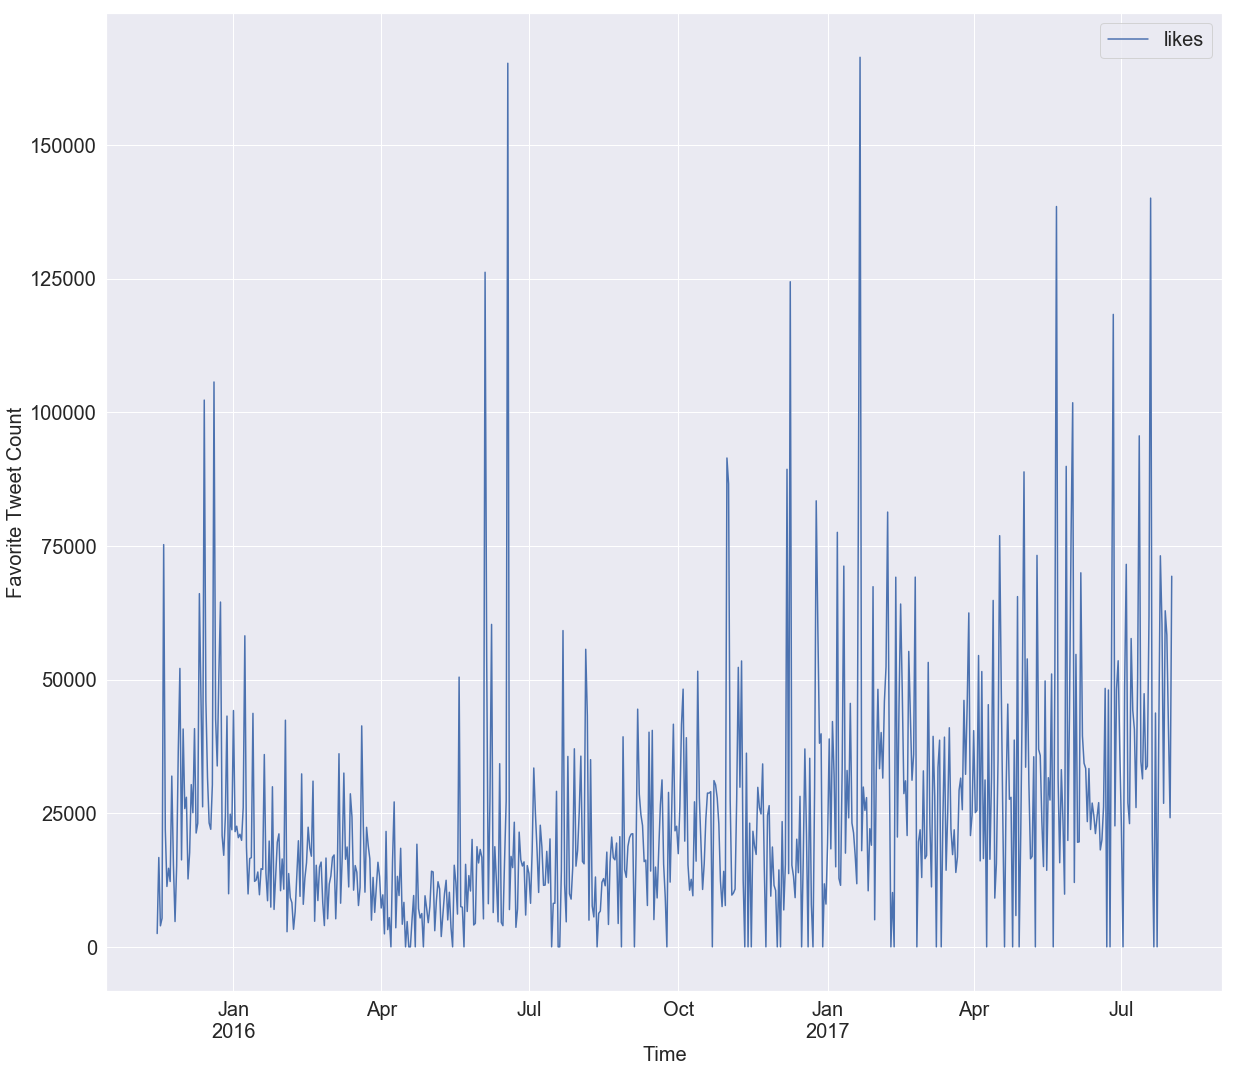

In [245]:
date_likes.resample('D').sum().plot(figsize=(20, 18), fontsize=20 ) 
plt.xlabel('Time', fontsize=20);
plt.ylabel('Favorite Tweet Count', fontsize=20);
plt.legend(loc='best', fontsize=20)
plt.show()

In [404]:
retweets_sorted = master.sort_values(by='retweet_count', ascending=False)
rtw = retweets_sorted.reset_index(drop=True)
print('Mean retweets:', round(rtw['retweet_count'].mean(),2), '\n')  # cite 6

Mean retweets: 2698.1 



In [405]:
# top 5 retweeted tweets' 
for i in range(5):
    print(rtw['full_text'].iloc[i], '-', rtw['retweet_count'].iloc[i])
print('\n')  # cite 6

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4 - 80602
Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC - 59780
This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d - 58738
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc - 45493
This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY - 41914




In [408]:
favorites_sorted = master.sort_values(by='favorite_count', ascending=False)
ftw = favorites_sorted.reset_index(drop=True)
print('Mean favorites:', round(ftw['favorite_count'].mean(),2), '\n')  # cite 6

Mean favorites: 8303.44 



In [410]:
# top 5 favorited tweets' 
for i in range(5):
    print(ftw['full_text'].iloc[i], '-', ftw['favorite_count'].iloc[i])
print('\n')  # cite 6

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4 - 161010
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc - 137238
This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d - 124414
This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr - 119639
Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC - 118925




In [415]:
import collections
print(collections.Counter(" ".join(master["full_text"]).split()).most_common(100)) # cite 7

[('is', 1286), ('This', 1087), ('a', 960), ('to', 607), ('the', 558), ("He's", 446), ('12/10', 434), ('He', 423), ('would', 382), ('11/10', 382), ('10/10', 379), ('for', 321), ('of', 296), ('in', 284), ('13/10', 254), ('and', 223), ('his', 214), ('Meet', 201), ('just', 164), ('this', 164), ('on', 163), ('be', 163), ('with', 158), ('pet', 150), ('you', 148), ('pupper', 146), ('She', 145), ("She's", 143), ('I', 142), ('af', 135), ('af.', 132), ('but', 130), ('9/10', 125), ('dog', 117), ('he', 113), ('that', 112), ('at', 109), ('an', 108), ('your', 104), ('her', 103), ('good', 97), ('it', 97), ('all', 97), ('very', 94), ('like', 93), ('not', 92), ('hello', 92), ('as', 91), ('was', 90), ('only', 89), ('Say', 89), ('pup', 88), ('8/10', 82), ('has', 81), ('h*ckin', 76), ('RT', 72), ('have', 71), ('here.', 71), ('him', 70), ('so', 70), ('dogs.', 70), ('Very', 69), ('by', 68), ('rate', 67), ('are', 67), ('still', 67), ('one', 66), ('out', 63), ('We', 59), ('from', 58), ("he's", 58), ('dog.', 5

In [428]:
# stages = ['doggo','floofer', 'pupper', 'puppo']
# # master[stages].value_counts().plot.bar();
# df = pd.DataFrame(columns=list(stages))
# df.apply(pd.Series.value_counts)
# pd.crosstab(**master.melt(var_name=stages, value_name='index'))
# # master.groupby(['doggo','floofer', 'pupper', 'puppo']).size().reset_index(name="Time")
# pd.crosstab(master.doggo,master.floofer,master.pupper,master.puppo)

> Citations:
1. https://stackoverflow.com/questions/47889565/reading-json-objects-from-text-file-into-pandas
2. https://stackoverflow.com/questions/35488036/using-lambda-and-strftime-on-dates-when-there-are-null-values-pandas
3. https://stackoverflow.com/questions/49127961/python-pandas-can-not-merge-dataframe-with-instance-of-type-class-str
4. https://chrisalbon.com/python/data_wrangling/pandas_time_series_basics/
5. https://www.kaggle.com/andraszsom/dog-breeds-dog-groups
6. https://www.kdnuggets.com/2017/03/beginners-guide-tweet-analytics-pandas.html
7. https://stackoverflow.com/questions/29903025/count-most-frequent-100-words-from-sentences-in-dataframe-pandas